<a href="https://colab.research.google.com/github/erikamarchi/bootcamp-alura-data-science/blob/main/modulo-01/Dados_Hospitalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configurações iniciais

##Imports

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

##Configuração de ponto flutuante

In [101]:
pd.options.display.float_format = "{:.2f}".format

##Configuração dos gráficos

In [102]:
import seaborn as sns

In [103]:
sns.set_theme(style="whitegrid")
#paleta de cores acessíveis
sns.color_palette("viridis", as_cmap=True)

#Obtendo e explorando dados do datasus a partir do ano de 2008


In [104]:
import pandas as pd

In [105]:
dados = pd.read_csv("/content/A160324189_28_143_208.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3, 
                    sep=";", 
                    skipfooter=12,
                    thousands=".", 
                    decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [106]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

#Tratamento de dados

In [107]:
dados.replace({'-': '0.00'}, inplace=True)

In [108]:
type(dados['2020/Ago'][0])

str

In [109]:
dados['2020/Ago'] = dados['2020/Ago'].astype(float)

In [110]:
type(dados['2020/Ago'][0])

numpy.float64

##Descarta colunas de anos que não possuiam as informações 


*   cria e trata dataframe **usaveis**




In [111]:
colunas_utilizaveis = dados.mean().index.tolist()
colunas_utilizaveis.insert(0, "Unidade da Federação")

In [112]:
usaveis = dados[colunas_utilizaveis]

In [113]:
usaveis = usaveis.set_index("Unidade da Federação")

In [114]:
usaveis = usaveis.drop("Total", axis=1)

##Tratamento dos estados por região

In [115]:
dict_regiao = {'1': 'Norte',
               '2': 'Nordeste',
               '3': 'Sudeste',
               '4': 'Sul',
               '5': 'Centro-Oeste'}

In [116]:
usaveis_por_regiao = usaveis.copy()
usaveis_por_regiao["Região"] = usaveis_por_regiao.index.str.slice(0,1)
usaveis_por_regiao["Região"].replace(dict_regiao, inplace=True)
usaveis_por_regiao = usaveis_por_regiao.set_index('Região')

##Ordena pelos estados que mais gastaram

In [117]:
usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop(["Total"], axis=1)
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.67,4.43,14.58,35.03,76.67,1023.56,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,...,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41
31 Minas Gerais,0.97,2.86,10.02,21.73,43.43,205.91,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,...,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47


##Descarta colunas com dados discrepantes

In [118]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total_sem_discrepante = ordenado_por_total[colunas_interessadas]

#Gráfico de gastos por estado brasileiro

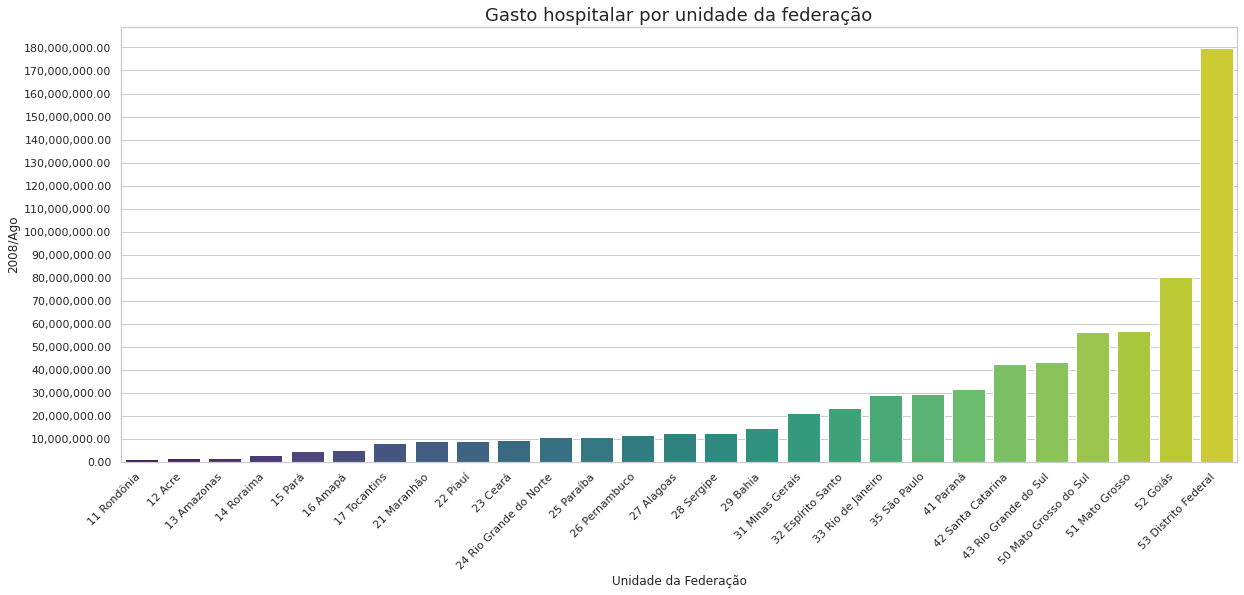

In [119]:
import matplotlib.ticker as ticker

ax = sns.barplot(data=dados.sort_values(["2008/Ago"]),
            x='Unidade da Federação',
            y='2008/Ago',
            palette='viridis')

ax.set_title('Gasto hospitalar por unidade da federação',fontsize=18)
ax.figure.set_size_inches(20,8)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.yaxis.set_ticks([i for i in range(0, int(max(dados['2008/Ago'])+5000000), 10000000)])
ax.set_xticklabels(dados['Unidade da Federação'],rotation=45,ha='right');

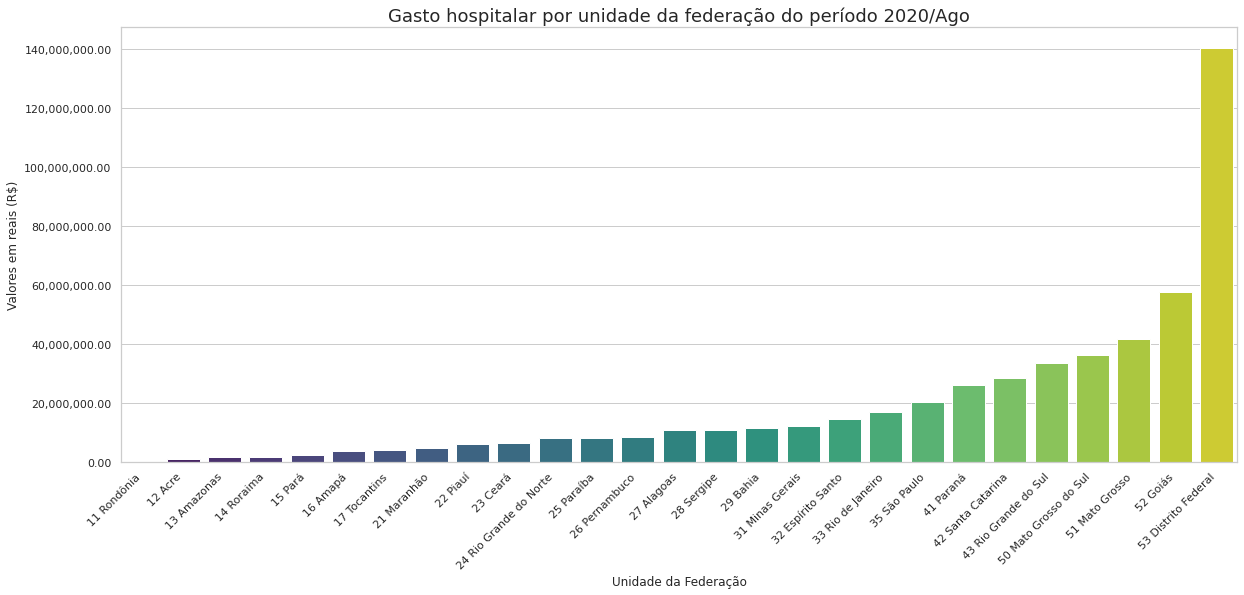

In [120]:
ax = sns.barplot(data=dados.sort_values(["2020/Ago"]),
            x='Unidade da Federação',
            y='2020/Ago',
            palette='viridis')

ax.set_title('Gasto hospitalar por unidade da federação do período 2020/Ago',fontsize=18)
ax.figure.set_size_inches(20,8)
ax.set_ylabel("Valores em reais (R$)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.yaxis.set_ticks([i for i in range(0, int(max(dados['2020/Ago'])+5000000), 20000000)])
ax.set_xticklabels(dados['Unidade da Federação'],rotation=45,ha='right');

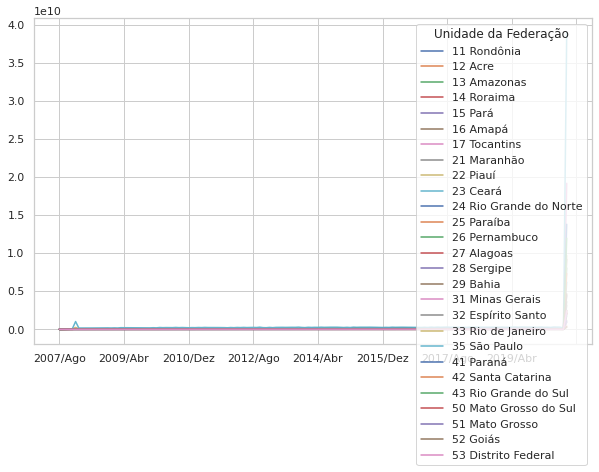

In [121]:
usaveis.T.plot(figsize=(10,6))

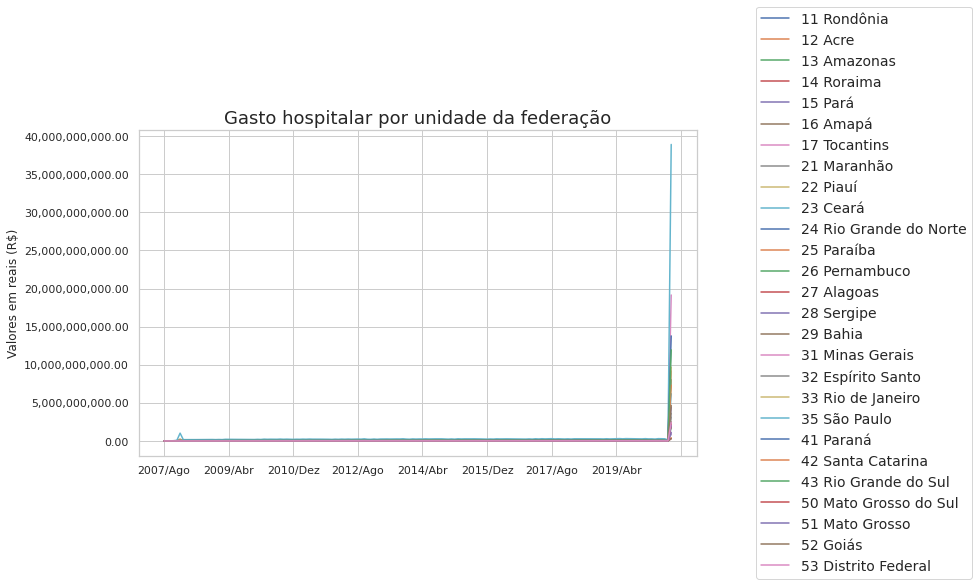

In [122]:
ax = usaveis.T.plot(figsize=(10,6))
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.set_title('Gasto hospitalar por unidade da federação',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

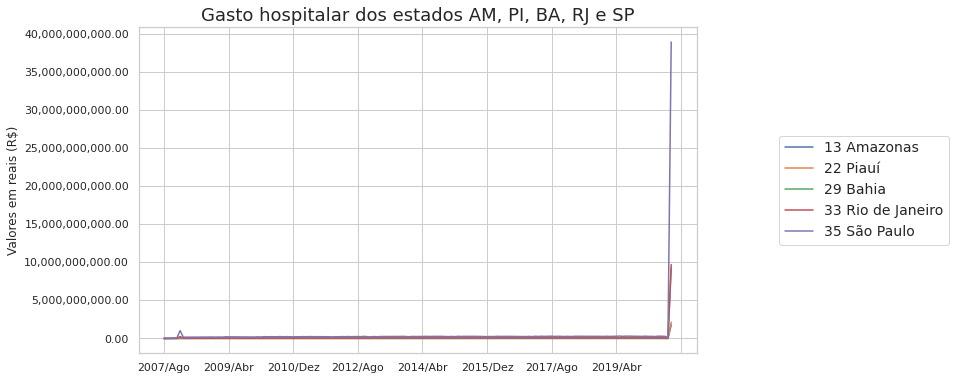

In [123]:
estados_para_analise = ['13 Amazonas','22 Piauí','29 Bahia','33 Rio de Janeiro', '35 São Paulo']
ax = usaveis.T[estados_para_analise].plot(figsize=(10,6))

ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.set_title('Gasto hospitalar dos estados AM, PI, BA, RJ e SP',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

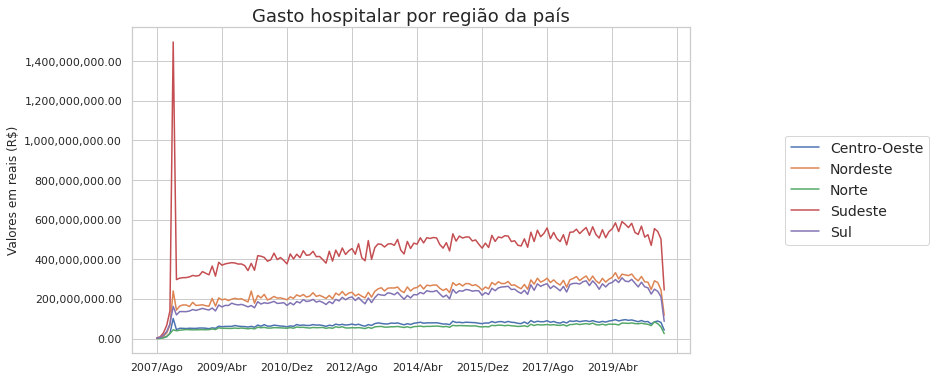

In [124]:
ax = usaveis_por_regiao.groupby(usaveis_por_regiao.index).sum().T.plot(figsize=(10,6))
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.set_title('Gasto hospitalar por região da país',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

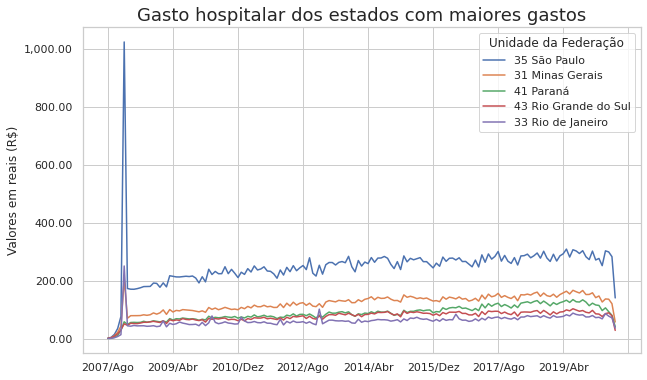

In [125]:
ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))
ax.set_title('Gasto hospitalar dos estados com maiores gastos',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

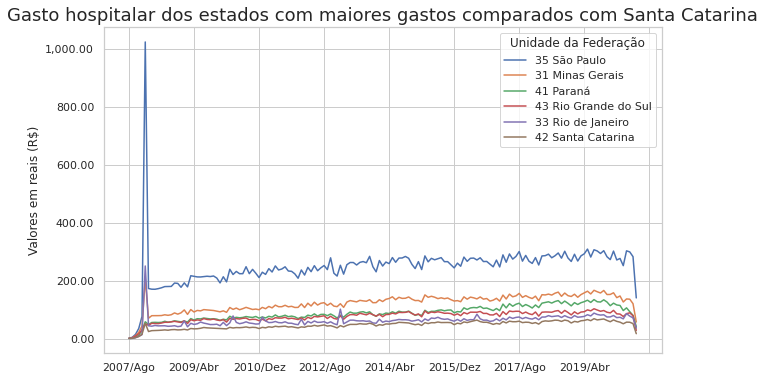

In [126]:
maiores_gastos = pd.concat([ordenado_por_total.head(5), ordenado_por_total.query('index == "42 Santa Catarina"')])
ax = maiores_gastos.T.plot(figsize=(10,6))
ax.set_title('Gasto hospitalar dos estados com maiores gastos comparados com Santa Catarina',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.figure.set_size_inches(10,6);

**Utilizando dataframe sem os dados discrepantes**

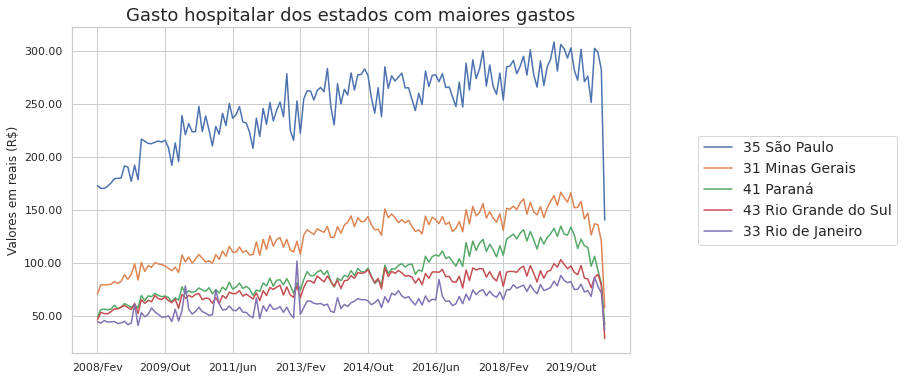

In [127]:
ax = ordenado_por_total_sem_discrepante.head(5).T.plot(figsize=(10,6))
ax.set_title('Gasto hospitalar dos estados com maiores gastos',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.figure.set_size_inches(10,6);

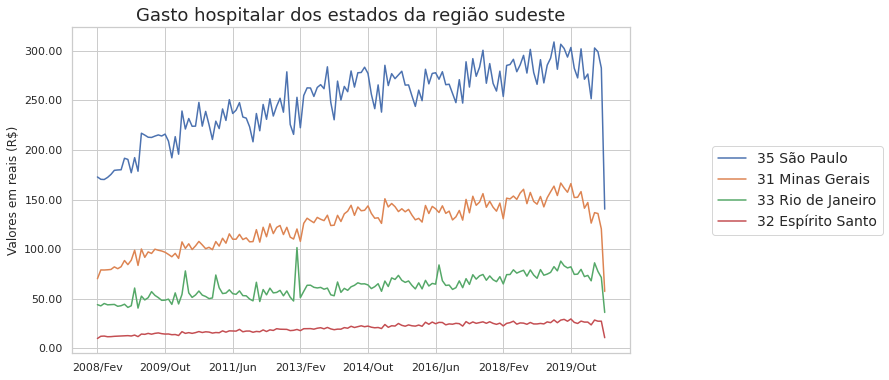

In [128]:
df = ordenado_por_total_sem_discrepante[ordenado_por_total_sem_discrepante.index.isin(['35 São Paulo','31 Minas Gerais','33 Rio de Janeiro','32 Espírito Santo'])]
ax = df.T.plot(figsize=(10,6))

ax.set_title('Gasto hospitalar dos estados da região sudeste',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.figure.set_size_inches(10,6);

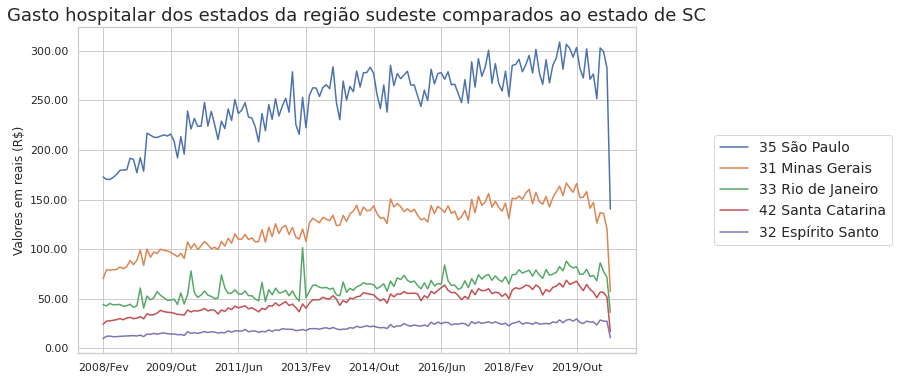

In [129]:
df = ordenado_por_total_sem_discrepante[ordenado_por_total_sem_discrepante.index.isin(['35 São Paulo','31 Minas Gerais','33 Rio de Janeiro','32 Espírito Santo','42 Santa Catarina'])]

ax = df.T.plot(figsize=(10,6))
ax.set_title('Gasto hospitalar dos estados da região sudeste comparados ao estado de SC',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.figure.set_size_inches(10,6);

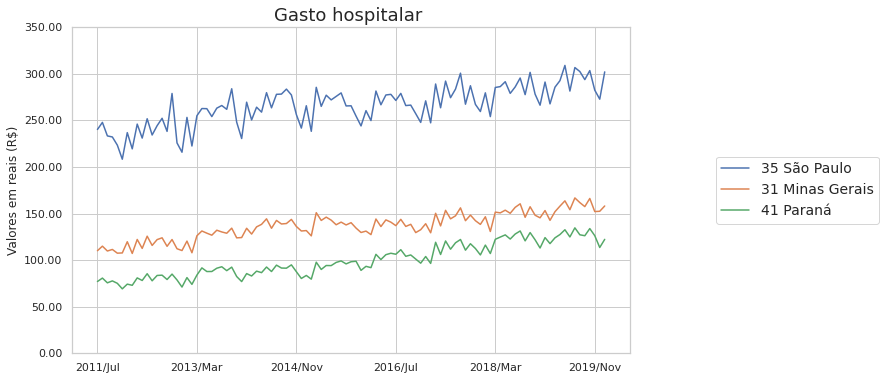

In [132]:
meses_filtrados = ordenado_por_total.columns[47:150] 

ax = ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
ax.set_title('Gasto hospitalar ',fontsize=18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_ylabel("Valores em reais (R$)")
ax.legend(loc='center', bbox_to_anchor=(1.3,0.5), fontsize=14)
ax.axes.set_ylim(0, 350)
ax.figure.set_size_inches(10,6);